In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
orders = pd.read_csv('orders.csv')
train = pd.read_csv('order_products__train.csv')
# aisles = pd.read_csv('aisles.csv')

In [4]:
# departments = pd.read_csv('departments.csv')
products = pd.read_csv('products.csv')

In [5]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
product_reorder = pd.merge(products, train, on='product_id', how ='inner')

In [9]:
product_reorder.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1


In [10]:
product_reorder = pd.merge(product_reorder, orders, on='order_id', how ='inner')

In [11]:
product_reorder.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,1540,train,29,1,1,8.0
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0,194636,train,5,2,14,11.0
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0,751,train,7,2,6,30.0
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0,142585,train,6,1,13,30.0
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1,57938,train,49,4,11,21.0


In [12]:
product_reorder.isna().sum()

product_id                0
product_name              0
aisle_id                  0
department_id             0
order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [13]:
product_reorder.duplicated().sum()

0

In [14]:
product_reorder.describe()

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,2.555624e+04,7.130423e+01,9.839777e+00,1.706298e+06,8.758044e+00,5.985944e-01,1.031128e+05,1.709141e+01,2.701392e+00,1.357759e+01,1.706613e+01
std,1.412127e+04,3.810409e+01,6.292830e+00,9.897326e+05,7.423936e+00,4.901829e-01,5.948715e+04,1.661404e+01,2.167646e+00,4.238458e+00,1.042642e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338000e+04,3.100000e+01,4.000000e+00,8.433700e+05,3.000000e+00,0.000000e+00,5.173200e+04,6.000000e+00,1.000000e+00,1.000000e+01,7.000000e+00
50%,2.529800e+04,8.300000e+01,8.000000e+00,1.701880e+06,7.000000e+00,1.000000e+00,1.029330e+05,1.100000e+01,3.000000e+00,1.400000e+01,1.500000e+01
75%,3.794000e+04,1.070000e+02,1.600000e+01,2.568023e+06,1.200000e+01,1.000000e+00,1.549590e+05,2.100000e+01,5.000000e+00,1.700000e+01,3.000000e+01
max,4.968800e+04,1.340000e+02,2.100000e+01,3.421070e+06,8.000000e+01,1.000000e+00,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [15]:
product_reorder = product_reorder.drop(['aisle_id','department_id','add_to_cart_order','days_since_prior_order','order_hour_of_day',
                                        'order_dow','order_number','eval_set'],axis=1)

In [16]:
product_reorder.head()

,product_id,product_name,order_id,reordered,user_id
0,1,Chocolate Sandwich Cookies,6695,1,1540
1,1,Chocolate Sandwich Cookies,48361,0,194636
2,1,Chocolate Sandwich Cookies,63770,0,751
3,1,Chocolate Sandwich Cookies,75339,0,142585
4,1,Chocolate Sandwich Cookies,240996,1,57938


## 판매량 순위

In [17]:
# 제품별 총 판매량 계산
top_products = product_reorder.groupby("product_name")["reordered"].count()

# 판매량 상위 10개 제품 추출
top_10_products = top_products.nlargest(10)

# 결과 출력
print(top_10_products)

product_name
Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: reordered, dtype: int64


## 등분산성 검정 및 T검정

In [102]:
import scipy.stats as stats

# is_organic 컬럼 생성 (대소문자 무시, 결측치는 False 처리)
product_reorder["is_organic"] = product_reorder["product_name"].str.contains("organic", case=False, na=False)

# Organic 제품과 일반 제품의 reordered 값 추출 (Levene's test 수행을 위해 미리 정의)
organic_reorders = product_reorder[product_reorder["is_organic"] == True]["reordered"]
non_organic_reorders = product_reorder[product_reorder["is_organic"] == False]["reordered"]

# ✅ 등분산 검정 수행 (Levene's test)
stat, p_value = stats.levene(organic_reorders, non_organic_reorders)

# 결과 확인
print(f"Levene's test statistic: {stat:.4f}, p-value: {p_value:.10f}")

# ✅ 등분산 여부 판단 (유의수준 5%)
equal_variance = p_value >= 0.05
if equal_variance:
    print("✅ 등분산성이 만족됨 (equal_var=True)")
else:
    print("⚠️ 등분산성이 만족되지 않음 (equal_var=False) → Welch's t-test 적용")

Levene's test statistic: 5639.7744, p-value: 0.0000000000
⚠️ 등분산성이 만족되지 않음 (equal_var=False) → Welch's t-test 적용


In [103]:
# 각 그룹(organic vs 일반 제품)의 재구매율 계산
organic_reorder_rate = product_reorder.groupby("is_organic")["reordered"].mean()

# 결과 출력
print("✅ Organic vs 일반 제품 재구매율 비교:")
print(organic_reorder_rate)

# 유기농 제품의 재구매율이 일반 제품보다 약 7% 높음
organic_difference = organic_reorder_rate[True] - organic_reorder_rate[False]
print(f"Organic 제품의 재구매율이 일반 제품보다 {organic_difference:.2%} 더 높습니다.\n")

# Organic 제품과 일반 제품의 reordered 값 추출
organic_reorders = product_reorder[product_reorder["is_organic"] == True]["reordered"]
non_organic_reorders = product_reorder[product_reorder["is_organic"] == False]["reordered"]

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(organic_reorders, non_organic_reorders, equal_var=False)

# 결과 출력 (소수점 10자리까지 표시)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")

# 유의수준 설정 (5%)
alpha = 0.05  

# 가설 검정 결과 해석
if p_value < alpha:
    print("🔍 통계적으로 유의미한 차이가 있습니다.")
    if t_stat > 0:
        print("✅ Organic 제품의 재구매율이 **유의미하게 높습니다.**")
    else:
        print("✅ Organic 제품의 재구매율이 **유의미하게 낮습니다.** (예외적인 경우)")
else:
    print("⚠️ Organic 제품과 일반 제품의 재구매율 차이는 **통계적으로 유의하지 않습니다.**")


✅ Organic vs 일반 제품 재구매율 비교:
is_organic
False    0.578498
True     0.647098
Name: reordered, dtype: float64
Organic 제품의 재구매율이 일반 제품보다 6.86% 더 높습니다.

T-statistic: 76.1247
P-value: 0.0000000000
🔍 통계적으로 유의미한 차이가 있습니다.
✅ Organic 제품의 재구매율이 **유의미하게 높습니다.**


# K-Means

In [96]:
# 고객별 유기농 제품과 일반 제품 재구매 패턴 분석
customer_reorder = product_reorder.groupby(["user_id", "is_organic"]).agg(
    total_purchases=("reordered", "count"),
    total_reorders=("reordered", "sum")
).reset_index()

# 유기농과 일반 제품으로 분리
organic_reorders = customer_reorder[customer_reorder["is_organic"] == True][["user_id", "total_purchases", "total_reorders"]]
non_organic_reorders = customer_reorder[customer_reorder["is_organic"] == False][["user_id", "total_purchases", "total_reorders"]]

# 컬럼명 변경
organic_reorders.columns = ["user_id", "organic_purchases", "organic_reorders"]
non_organic_reorders.columns = ["user_id", "non_organic_purchases", "non_organic_reorders"]

# 고객별 유기농 제품 재구매율과 일반 제품 재구매율 계산
customer_reorder_summary = pd.merge(organic_reorders, non_organic_reorders, on="user_id", how="outer").fillna(0)
customer_reorder_summary["organic_reorder_rate"] = customer_reorder_summary["organic_reorders"] / customer_reorder_summary["organic_purchases"]
customer_reorder_summary["non_organic_reorder_rate"] = customer_reorder_summary["non_organic_reorders"] / customer_reorder_summary["non_organic_purchases"]

# NaN 값 처리 (0으로 대체)
customer_reorder_summary.fillna(0, inplace=True)

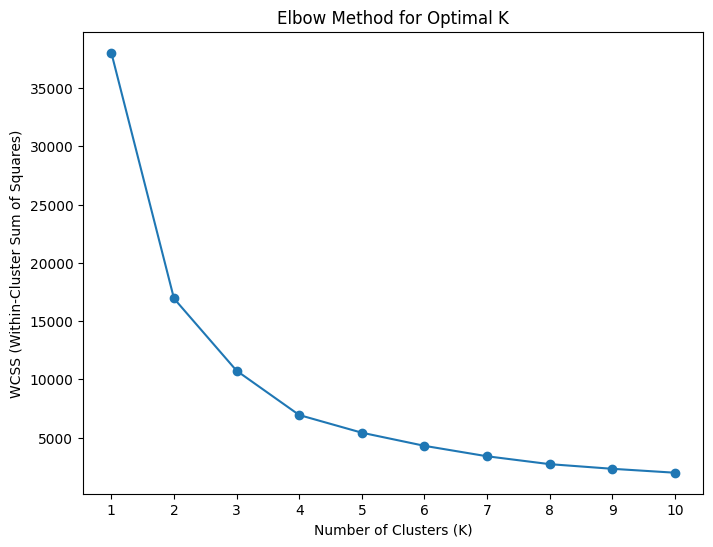

In [97]:
# 사용할 데이터 선택
features = customer_reorder_summary[["organic_reorder_rate", "non_organic_reorder_rate"]]

# 데이터 정규화 (MinMax Scaling)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# WCSS(Within-Cluster Sum of Squares) 저장 리스트
wcss = []

# K 값 1~10까지 반복
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)  # inertia_는 WCSS 값

# 엘보우 차트 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.show()


엘보우 방법

WCSS(Within-Cluster Sum of Squares) 감소를 분석하는 방법
K가 증가할수록 군집 내 거리(WCSS)가 줄어들지만, K가 너무 크면 과적합(overfitting)이 발생할 수 있음.  
WCSS의 급격한 감소가 둔화되는 **엘보우 지점(K=3 또는 K=4)**이 적절하다고 판단.  

In [98]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, labels)
    print(f"K={k}, Silhouette Score: {score:.4f}")

K=2, Silhouette Score: 0.5032
K=3, Silhouette Score: 0.4979
K=4, Silhouette Score: 0.4931
K=5, Silhouette Score: 0.5093
K=6, Silhouette Score: 0.5005
K=7, Silhouette Score: 0.5076
K=8, Silhouette Score: 0.5155
K=9, Silhouette Score: 0.5218
K=10, Silhouette Score: 0.5238


실루엣 점수(Silhouette Score)

군집 간 분리도와 응집도를 평가하는 방법  
점수가 클수록 각 군집이 더 명확히 구분됨  
현재 결과에서는 K=2에서 점수가 가장 높음, 즉 K=2가 가장 군집이 명확히 구분됨을 의미.  

#### [엘보우차트를 근거로 사용]

# K-means

In [99]:
# 파생변수 생성
# 유기농 선호 지수 (Organic Preference Score)
customer_reorder_summary["organic_preference"] = (
    customer_reorder_summary["organic_reorder_rate"] - customer_reorder_summary["non_organic_reorder_rate"]
)
#총 재구매 횟수 (Total Reorders)
customer_reorder_summary["total_reorders"] = (
    customer_reorder_summary["organic_reorders"] + customer_reorder_summary["non_organic_reorders"]
)
#유기농 제품 비율 (Organic Purchase Ratio)
customer_reorder_summary["organic_purchase_ratio"] = (
    customer_reorder_summary["organic_purchases"] / 
    (customer_reorder_summary["organic_purchases"] + customer_reorder_summary["non_organic_purchases"])
)

#첫 구매 이후 재구매율 (첫 구매 후 동일 제품을 재구매한 비율)
first_purchase = product_reorder.groupby("user_id")["reordered"].sum() / product_reorder.groupby("user_id")["order_id"].count()
customer_reorder_summary = customer_reorder_summary.merge(first_purchase.rename("first_to_repeat_ratio"), on="user_id", how="left").fillna(0)

scaler = MinMaxScaler()
customer_reorder_summary["first_to_repeat_ratio_scaled"] = scaler.fit_transform(
    customer_reorder_summary[["first_to_repeat_ratio"]]
)

# NaN 처리 (0으로 대체)
customer_reorder_summary.fillna(0, inplace=True)

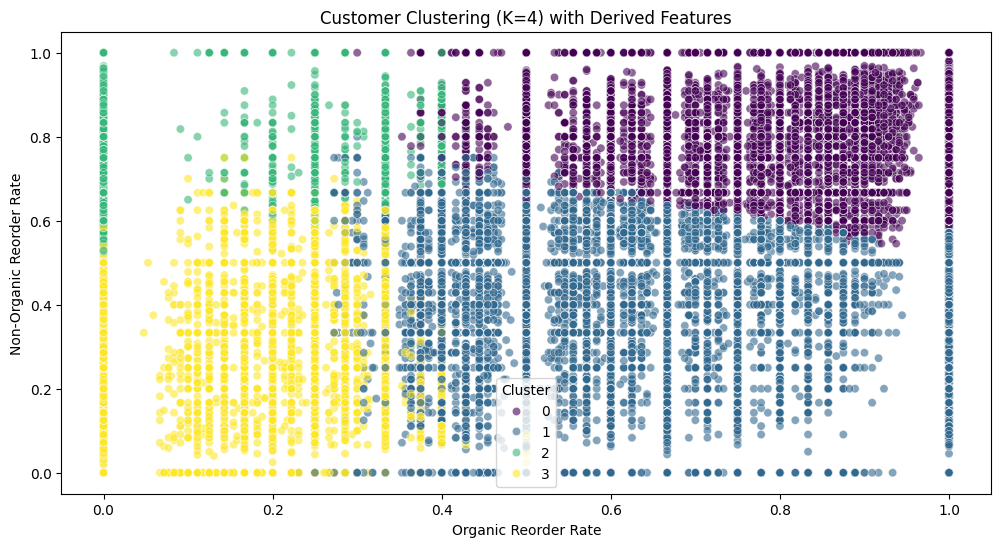

In [100]:
# 사용할 변수 설정
features = customer_reorder_summary[[
    "organic_reorder_rate", "non_organic_reorder_rate", "organic_preference", 
    "total_reorders", "organic_purchase_ratio", "first_to_repeat_ratio_scaled"
]]

# 데이터 정규화 (MinMax Scaling)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# K-means 실행 (K=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_reorder_summary["cluster"] = kmeans.fit_predict(features_scaled)

# 시각화 - 클러스터별 유기농 재구매율과 일반 재구매율 분포
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=customer_reorder_summary["organic_reorder_rate"],
    y=customer_reorder_summary["non_organic_reorder_rate"],
    hue=customer_reorder_summary["cluster"],
    palette="viridis",
    alpha=0.6
)
plt.xlabel("Organic Reorder Rate")
plt.ylabel("Non-Organic Reorder Rate")
plt.title("Customer Clustering (K=4) with Derived Features")
plt.legend(title="Cluster")
plt.show()


## K-means 시각화

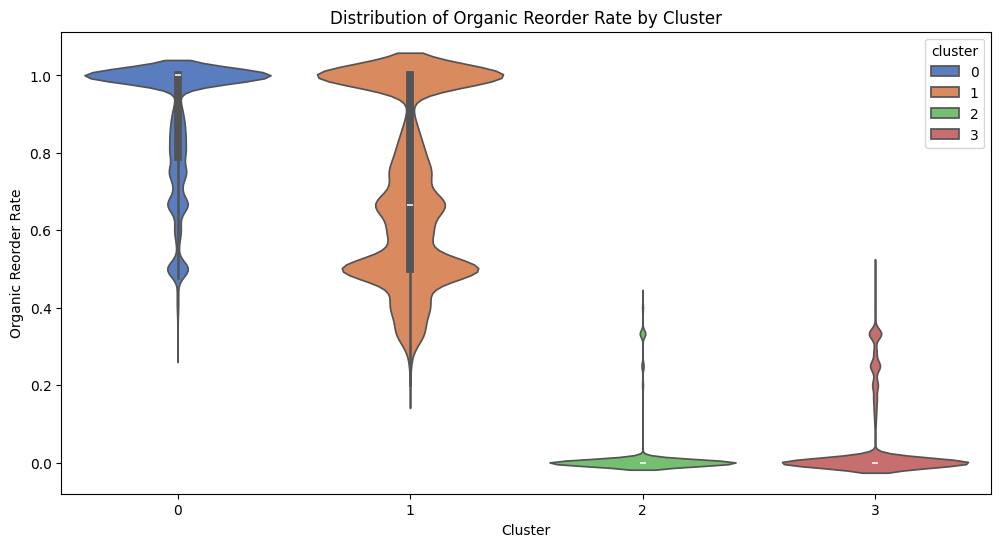

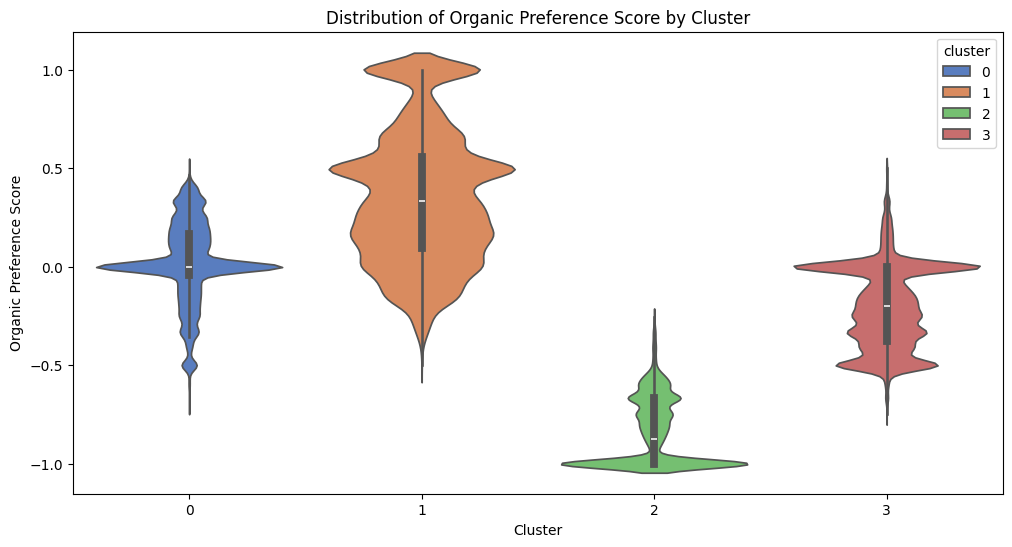

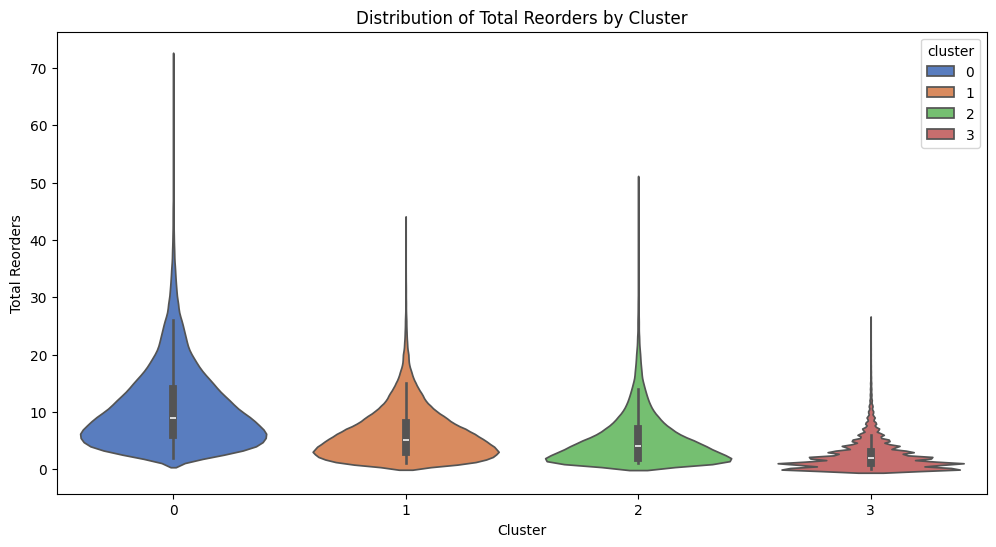

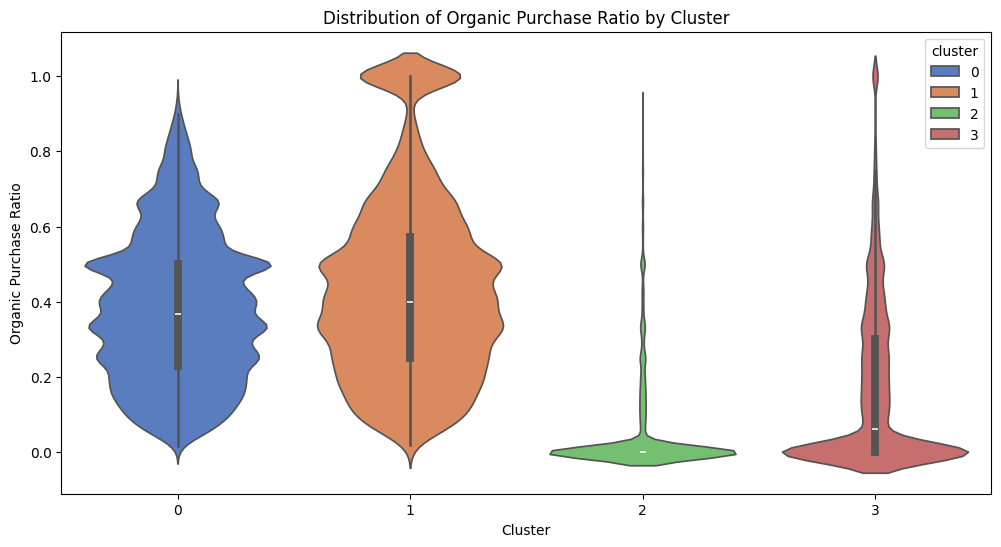

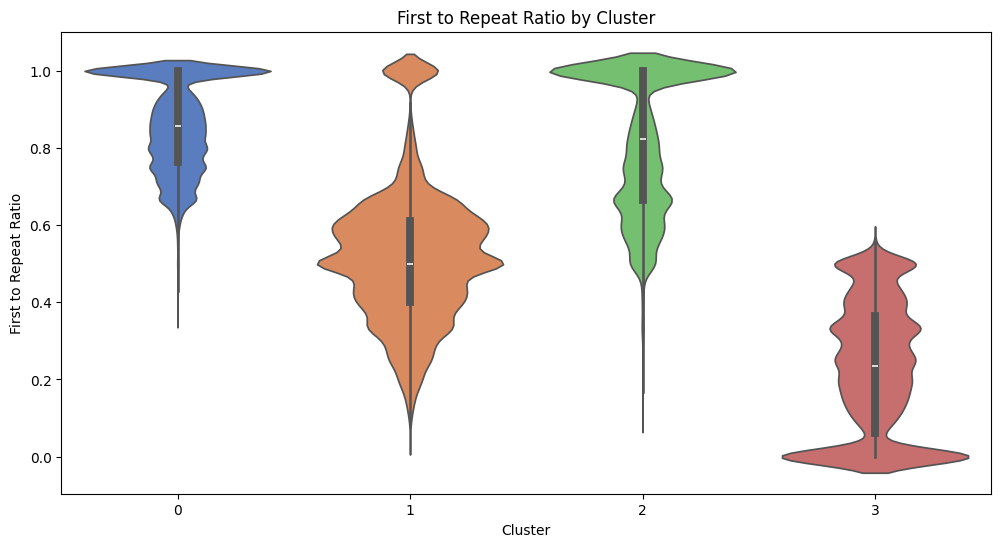

In [101]:
# 클러스터별 유기농 재구매율 (organic_reorder_rate)
plt.figure(figsize=(12, 6))
sns.violinplot(x=customer_reorder_summary["cluster"], y=customer_reorder_summary["organic_reorder_rate"], hue=customer_reorder_summary["cluster"], palette="muted")
plt.xlabel("Cluster")
plt.ylabel("Organic Reorder Rate")
plt.title("Distribution of Organic Reorder Rate by Cluster")
plt.show()

# 클러스터별 유기농 선호도 점수 분포 (바이올린 플롯)
plt.figure(figsize=(12, 6))
sns.violinplot(x=customer_reorder_summary["cluster"], y=customer_reorder_summary["organic_preference"], hue=customer_reorder_summary["cluster"], palette="muted")
plt.xlabel("Cluster")
plt.ylabel("Organic Preference Score")
plt.title("Distribution of Organic Preference Score by Cluster")
plt.show()

# 클러스터별 전체 재구매 횟수 분포 (바이올린 플롯)
plt.figure(figsize=(12, 6))
sns.violinplot(x=customer_reorder_summary["cluster"], y=customer_reorder_summary["total_reorders"], hue=customer_reorder_summary["cluster"], palette="muted")
plt.xlabel("Cluster")
plt.ylabel("Total Reorders")
plt.title("Distribution of Total Reorders by Cluster")
plt.show()

# 클러스터별 유기농 구매 비율 분포 (바이올린 플롯)
plt.figure(figsize=(12, 6))
sns.violinplot(x=customer_reorder_summary["cluster"], y=customer_reorder_summary["organic_purchase_ratio"], hue=customer_reorder_summary["cluster"],palette="muted")
plt.xlabel("Cluster")
plt.ylabel("Organic Purchase Ratio")
plt.title("Distribution of Organic Purchase Ratio by Cluster")
plt.show()

# 클러스터별 첫 구매 이후 재구매율
plt.figure(figsize=(12, 6))
sns.violinplot(x=customer_reorder_summary["cluster"], y=customer_reorder_summary["first_to_repeat_ratio"], hue=customer_reorder_summary["cluster"], palette="muted", legend=False)
plt.xlabel("Cluster")
plt.ylabel("First to Repeat Ratio")
plt.title("First to Repeat Ratio by Cluster")
plt.show()

1. 유기농 제품 재구매율(Organic Reorder Rate)  
클러스터 0  → 유기농 재구매율이 매우 높음   
클러스터 1  → 유기농 재구매율이 매우 높음   
클러스터 2  → 유기농 재구매율이 거의 없음   
클러스터 3  → 유기농 재구매율이 거의 없음   
  
클러스터 0,1은 유기농 제품을 지속적으로 재구매하는 충성 고객이며, 클러스터 2와 3은 유기농 제품을 거의 구매하지 않음.

2️. 유기농 선호도(Organic Preference Score)  
클러스터 0 → 유기농 선호도가 낮음   
클러스터 1 → 유기농 선호도가 매우 높음   
클러스터 2 → 유기농 선호도가 매우 낮음(음수)  
클러스터 3 → 유기농 선호도가 낮음  


클러스터 1은 유기농을 적극적으로 구매하는 고객군이고, 클러스터 2는 유기농을 선호하지 않는 고객군(거의 안 삼)

3️. 총 재구매 횟수(Total Reorders)  
클러스터 0 → 총 재구매 횟수가 상대적으로 많음   
클러스터 1 → 재구매 횟수가 많음  
클러스터 2 → 재구매 횟수가 많음   
클러스터 3 → 재구매 횟수가 매우 적음   


클러스터 3은 구매 횟수가 적은 신규 고객 or 비충성 고객, 클러스터 2는 재구매를 많이 하지만 유기농과 관련이 없는 고객

4️. 유기농 제품 구매 비율(Organic Purchase Ratio)  
클러스터 0 → 유기농 구매 비율이 중간수준  
클러스터 1 → 유기농 구매 비율이 높음   
클러스터 2 → 유기농 구매 비율이 없음  
클러스터 3 → 유기농 구매 비율이 낮음   


클러스터 1은 유기농 제품을 자주 구매하고, 클러스터 2는 거의 구매하지 않음.

5️. 첫 구매 이후 재구매율(First to Repeat Ratio)  
클러스터 0 → 재구매율이 높음   
클러스터 1 → 재구매율이 중간수준  
클러스터 2 → 재구매율이 높음  
클러스터 3 → 낮은 재구매율   

클러스터 3은 첫 구매 후 재구매율이 낮은 고객(비충성 고객)

클러스터 0 : 일반 제품과 유기농을 혼합해서 구매하는 고객 > 구매비율증가  
클러스터 1 : 유기농 제품을 선호하고 반복 구매하는 충성 고객 > 유지/객단가상승  
클러스터 2 : 일반 제품을 주로 소비하는 고객(유기농비선호) > 첫구매유도  
클러스터 3 : 첫 구매 후 재구매를 거의 하지 않는 신규 / 이탈 고객  > 첫구매유도 및 재구매 유도  